In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
import numpy as np
import glob

col_fn_run = ["freq","function", "invoke_time", "timeModelLoad", "startTime", "endTime", "excutionTime","response_time", "run_time","ip","type"]
col_fn_system = ['times','value','metrics','pod','node','fn','network']
col_perf = ['times','value','metrics','pod','node','fn','network']
col_node_interface = ["node", "interface","ip"]
model = ["lstm","mnist","mobilenet4","resnet18","shufflenet","resnet34"]



In [4]:
colors_for_function = [
 (0.2901960784313725, 0.43294117647058816, 0.6196078431372549),
 (0.6501960784313725, 0.37568627450980396, 0.18901960784313732),
 (0.2901960784313725, 0.43294117647058816, 0.6196078431372549),
 (0.8011764705882353, 0.14784313725490195, 0.4909803921568628),
 (0.6501960784313725, 0.37568627450980396, 0.18901960784313732),
 (0.4, 0.4, 0.4),
 (0.5415686274509803, 0.7447058823529411, 0.5415686274509803),
 (0.7486274509803922, 0.7047058823529412, 0.8090196078431372),
 (0.9221568627450979, 0.7547058823529411, 0.5954901960784315),
 (0.94, 0.9400000000000001, 0.66),
 (0.2901960784313725, 0.43294117647058816, 0.6196078431372549),
 (0.8011764705882353, 0.14784313725490195, 0.4909803921568628),
 (0.6501960784313725, 0.37568627450980396, 0.18901960784313732)]

In [9]:
df_fn_system  = pd.concat([pd.read_csv(f, sep=',', names=col_fn_system) for f in glob.glob('./fn_system/*.csv')], ignore_index=False)
df_fn_run = pd.concat([pd.read_csv(f, sep=',', names=col_fn_run) for f in glob.glob('./fn_run/*.csv')], ignore_index=False)


In [10]:
df_fn_system['pod'] = df_fn_system['pod'].apply(lambda x: x.split('-')[0])
df_fn_system = df_fn_system[df_fn_system['pod'].isin(model)]
# metrics = ['container_memory_working_set_bytes','container_cpu_load_average_10s','container_cpu_usage_seconds_total','container_memory_cache','container_memory_failures_total', 'container_memory_rss','container_memory_usage_bytes', 'container_network_receive_bytes_total', 'container_network_receive_errors_total', 'container_network_receive_packets_dropped_total', 'container_network_receive_packets_total', 'container_network_transmit_bytes_total', 'container_network_transmit_errors_total', 'container_network_transmit_packets_dropped_total', 'container_network_transmit_packets_total']

# df_fn_system_container_memory_rss = df_fn_system[df_fn_system['metrics'] == 'container_memory_rss']

df_fn_run['ip'] = df_fn_run['ip'].apply(lambda x: x.split('.')[0] + '.' + x.split('.')[1] + '.' + x.split('.')[2] + '.' + '0')

df_node_interface =  pd.read_csv("node_interface.csv", names = col_node_interface)
df_fn_run = df_fn_run.merge(df_node_interface, on='ip', how='left')

In [11]:
df_fn_system

,times,value,metrics,pod,node,fn,network
0,0,0.865250,cpu_utilization_pod,lstm,euler-30,lstm,Wlan0
1,1,0.192032,cpu_utilization_pod,lstm,euler-30,lstm,Wlan0
2,2,0.192205,cpu_utilization_pod,lstm,euler-30,lstm,Wlan0
3,3,0.192378,cpu_utilization_pod,lstm,euler-30,lstm,Wlan0
4,4,0.193840,cpu_utilization_pod,lstm,euler-30,lstm,Wlan0
...,...,...,...,...,...,...,...
7170,545,0.000000,container_fs_reads_bytes_total,resnet34,euler-9,resnet34,Wlan0
7171,546,0.000000,container_fs_reads_bytes_total,resnet34,euler-9,resnet34,Wlan0
7172,547,0.000000,container_fs_reads_bytes_total,resnet34,euler-9,resnet34,Wlan0
7173,548,0.000000,container_fs_reads_bytes_total,resnet34,euler-9,resnet34,Wlan0


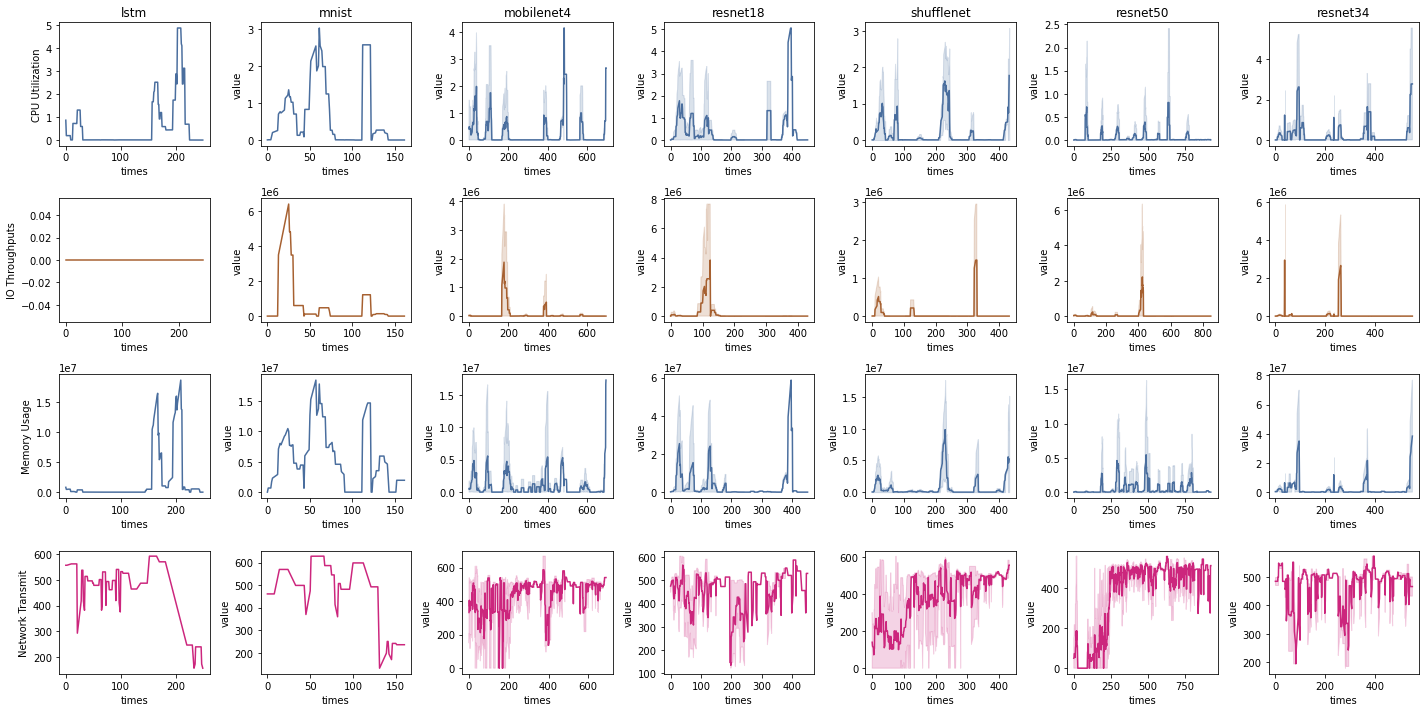

In [14]:
df = df_fn_system

hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**']

ylables = ['CPU Utilization','IO Throughputs', 'Memory Usage', 'Network Transmit']

fig, axs = plt.subplots(4, 7, figsize=(20,10))
for k in range(len(system_metrics)):
    data_plot = df.loc[df['metrics'] == system_metrics[k]]
    for i in range(len(model)):
        sns.lineplot(x='times', y='value', data=data_plot.loc[data_plot['fn']==model[i]], ax=axs[k][i], color=colors_for_function[k])
        if k == 0:
            axs[0][i].set_title(model[i])
        if i == 0:
            axs[k][0].set_ylabel(ylables[k])
        axs[k][i].set_xlabel('times')
plt.tight_layout()
plt.savefig('system_metrics.pdf', bbox_inches='tight',dpi=500)
plt.show()